**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
from sklearn.datasets import fetch_20newsgroups
 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
 
from sklearn.neighbors import KDTree
from sklearn.metrics import pairwise
from scipy.spatial import distance
from scipy.stats import mode
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric = 'euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    
    def fit(self, X, y):
        if(self.algorithm == 'brute'):
            self.X = X
            self.y = y
        if(self.algorithm == 'kd_tree'):
            self.tree = KDTree(X, leaf_size=20, metric='euclidean')
            self.y = y
    
    
    def fit_brute(self, X, y):
            self.X = X
            self.y = y    
    
    
    def predict(self, X):
        if(self.algorithm == 'brute'):
            dist = distance.cdist(X, self.X, metric= self.metric)
            ind = np.argpartition(dist, self.n_neighbors, axis = 1)[:, :self.n_neighbors]
            place = self.y[ind]
            y_pred = mode(place, axis=1)[0].ravel()
            return y_pred
 
    
        if(self.algorithm == 'kd_tree'):
            dd, ii = self.tree.query(X, self.n_neighbors)
            place = self.y[ii]
            y_pred = mode(place, axis=1)[0].ravel()
            return y_pred

In [ ]:
#         dist = pairwise.pairwise_distances(X, self.X, metric='euclidean')

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [19]:
iris = datasets.load_iris()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [21]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [22]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [23]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)
sklearn_pred = clf.predict(X_test)
# print(sklearn_pred)

In [24]:
my_clf_pred = my_clf.predict(X_test)
print(my_clf_pred)

[1 2 2 0 2 1 2 1 2 0 1 0 0 0 1]


In [25]:
my_clf_pred = my_clf.predict(X_test)

In [26]:
my_clf_pred

array([1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1])

In [27]:
sklearn_pred = clf.predict(X_test)
print(sklearn_pred)

[1 2 2 0 2 1 2 1 2 0 1 0 0 0 1]


In [28]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [54]:
%time clf.fit(X_train, y_train)

CPU times: user 1.96 ms, sys: 1.89 ms, total: 3.85 ms
Wall time: 8.37 ms


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [56]:
%time my_clf.fit(X_train, y_train)

CPU times: user 25 µs, sys: 0 ns, total: 25 µs
Wall time: 38.6 µs


In [47]:
%time clf.predict(X_test)

CPU times: user 4.71 ms, sys: 970 µs, total: 5.68 ms
Wall time: 4.19 ms


array([1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1])

In [34]:
%time my_clf.predict(X_test)

CPU times: user 6.54 ms, sys: 987 µs, total: 7.53 ms
Wall time: 7.74 ms


array([1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [57]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [58]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [59]:
%time clf.fit(X_train, y_train)

CPU times: user 2.86 ms, sys: 964 µs, total: 3.83 ms
Wall time: 12.1 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [60]:
%time my_clf.fit(X_train, y_train)

CPU times: user 620 µs, sys: 1.86 ms, total: 2.48 ms
Wall time: 2.74 ms


In [61]:
%time clf.predict(X_test)

CPU times: user 7.3 ms, sys: 3.97 ms, total: 11.3 ms
Wall time: 13 ms


array([0, 1, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 1, 1, 2])

In [62]:
%time my_clf.predict(X_test)

CPU times: user 5.94 ms, sys: 971 µs, total: 6.91 ms
Wall time: 6.58 ms


array([0, 1, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 1, 1, 2])

In [63]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [3]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [4]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [5]:
vectorizer = CountVectorizer(max_features=1500, min_df=0.005, max_df = 0.9)
X = vectorizer.fit_transform(data).toarray()
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(11314, 1500)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [ ]:
kf = KFold(n_splits=3)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
def optim(X, y, value_score, n = 10, metrics = 'euclidean'):
    for i in range(1, n+1):
        print('k', i)
        score = []
        for train, test in kf.split(target):
            X_train, y_train = X[train], target[train]
            X_test, y_test = X[test], target[test]
            my_clf = MyKNeighborsClassifier(n_neighbors = i, algorithm = 'brute', metric = metrics)
            my_clf.fit(X_train, y_train) 
            y_pred = my_clf.predict(X_test)
            score.append(accuracy_score(y_pred, y_test))
            # scores = cross_validate(my_clf, X, y, scoring=['accuracy'], cv=kf)
        value_score.append(np.mean(score))
    # plt.plot(np.arange(1, n+1), value_score)

In [ ]:
value_score_10_euclidean = []
%time optim(X, target, value_score_10_euclidean, 10, metrics = 'euclidean')

k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
CPU times: user 22min 29s, sys: 182 ms, total: 22min 29s
Wall time: 22min 31s


In [ ]:
#cosine max_n = 10
value_score_10_cosine = []
%time optim(X, target, value_score_10_cosine, 10, metrics = 'cosine')

k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
CPU times: user 22min 30s, sys: 708 ms, total: 22min 31s
Wall time: 22min 32s


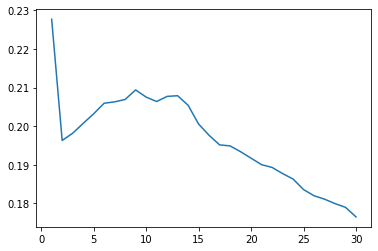

In [ ]:
value_score_30
plt.plot(np.arange(1, 31), value_score_30)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

The best k euclidean:  1
The best score euclidean:  0.20823745221645085
The best k cosine:  10
The best score cosine:  0.3226086150384523
Косинусная метрика лучше


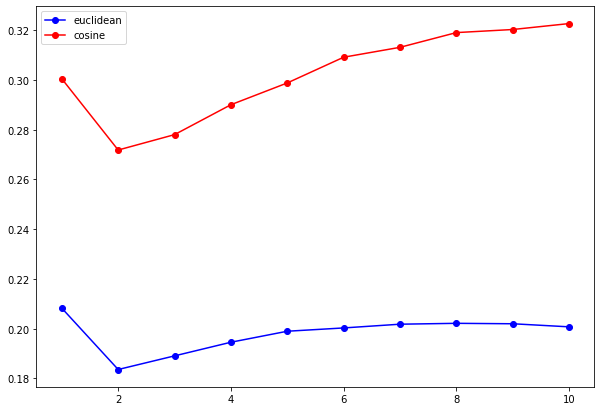

In [ ]:
# max_n = 10
fig = plt.figure(figsize= (10,7))
ax = fig.add_subplot()
x = np.arange(1, 11)
ax.plot(x, value_score_10_euclidean, 'bo-', label = 'euclidean')
ax.plot(x, value_score_10_cosine, 'ro-', label = 'cosine')
ax.legend()
the_best_k_euclidean = np.argmax(value_score_10_euclidean) + 1
the_best_score_euclidean = np.max(value_score_10_euclidean)
print('The best k euclidean: ', the_best_k_euclidean)
print('The best score euclidean: ', the_best_score_euclidean)
the_best_k_cosine = np.argmax(value_score_10_cosine) + 1
the_best_score_cosine = np.max(value_score_10_cosine)
print('The best k cosine: ', the_best_k_cosine)
print('The best score cosine: ', the_best_score_cosine)
print('Косинусная метрика лучше')

TFIDF

In [11]:
vectorizer = TfidfVectorizer( min_df=0.005, max_df = 0.9)
X = vectorizer.fit_transform(data).toarray()
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(11314, 2676)

In [ ]:
score_10_tfidf_euclidean = []
%time optim(X, target, score_10_tfidf_euclidean, 10, metrics = 'euclidean')

k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
CPU times: user 22min 54s, sys: 742 ms, total: 22min 55s
Wall time: 23min


In [ ]:
score_10_tfidf_cosine = []
%time optim(X, target, score_10_tfidf_cosine, 10, metrics = 'cosine')

k 1
k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
CPU times: user 22min 8s, sys: 421 ms, total: 22min 8s
Wall time: 22min 12s


The best k euclidean:  1
The best score euclidean:  0.17968833704109585
The best k cosine:  10
The best score cosine:  0.4390139620153768


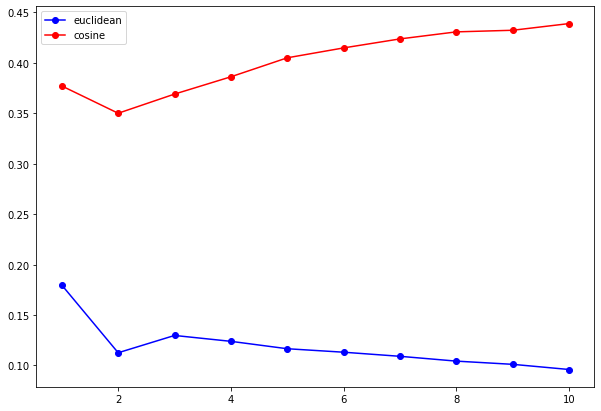

In [ ]:
# max_n = 10 tfidf
fig = plt.figure(figsize= (10,7))
ax = fig.add_subplot()
x = np.arange(1, 11)
ax.plot(x, score_10_tfidf_euclidean, 'bo-', label = 'euclidean')
ax.plot(x, score_10_tfidf_cosine, 'ro-', label = 'cosine')
ax.legend()
the_best_k_euclidean = np.argmax(score_10_tfidf_euclidean) + 1
the_best_score_euclidean = np.max(score_10_tfidf_euclidean)
print('The best k euclidean: ', the_best_k_euclidean)
print('The best score euclidean: ', the_best_score_euclidean)
the_best_k_cosine = np.argmax(score_10_tfidf_cosine) + 1
the_best_score_cosine = np.max(score_10_tfidf_cosine)
print('The best k cosine: ', the_best_k_cosine)
print('The best score cosine: ', the_best_score_cosine)

Таким образом, векторизация tfidf дает лучший результат с метрикой cosine

In [ ]:
def optim_dx(X, y, value_score, start, end, dx, metrics = 'euclidean'):
    for i in range(start, end+1, dx):
        print('k', i)
        score = []
        for train, test in kf.split(target):
            X_train, y_train = X[train], target[train]
            X_test, y_test = X[test], target[test]
            my_clf = MyKNeighborsClassifier(n_neighbors = i, algorithm = 'brute', metric = metrics)
            my_clf.fit(X_train, y_train) 
            y_pred = my_clf.predict(X_test)
            score.append(accuracy_score(y_pred, y_test))
            # scores = cross_validate(my_clf, X, y, scoring=['accuracy'], cv=kf)
        value_score.append(np.mean(score))
    # plt.plot(np.arange(1, n+1), value_score)

In [ ]:
score_1_150_10_tfidf_cosine = []
%time optim_dx(X, target, score_1_150_10_tfidf_cosine, 1, 150, 10, metrics = 'cosine')

k 1
k 11
k 21
k 31
k 41
k 51
k 61
k 71
k 81
k 91
k 101
k 111
k 121
k 131
k 141
CPU times: user 31min 45s, sys: 314 ms, total: 31min 45s
Wall time: 31min 48s


In [ ]:
score_1_150_10_cosine = score_1_150_10_tfidf_cosine

The best k cosine:  9
The best score cosine:  0.3595544226515559
The best k cosine:  15
The best score cosine:  0.5462257124214216
Следовательно, что cosine + tfidf даёт наилучший скор


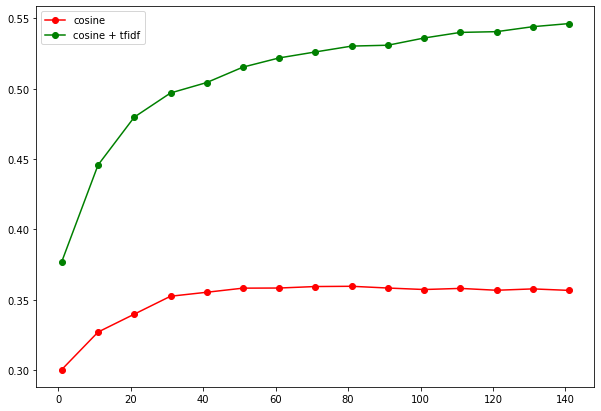

In [ ]:
fig = plt.figure(figsize= (10,7))
ax = fig.add_subplot()
x = np.arange(1, 150, 10)
ax.plot(x, score_1_150_10_cosine, 'ro-', label = 'cosine')
ax.plot(x, score_1_150_10_tfidf_cosine, 'go-', label = 'cosine + tfidf')
ax.legend()
the_best_k_cosine = np.argmax(score_1_150_10_cosine) + 1
the_best_score_cosine = np.max(score_1_150_10_cosine)
print('The best k cosine: ', the_best_k_cosine)
print('The best score cosine: ', the_best_score_cosine)
the_best_k_cosine = np.argmax(score_1_150_10_tfidf_cosine) + 1
the_best_score_cosine = np.max(score_1_150_10_tfidf_cosine)
print('The best k cosine: ', the_best_k_cosine)
print('The best score cosine: ', the_best_score_cosine)
print('Следовательно, что cosine + tfidf даёт наилучший скор')

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [6]:
newsgroups1 = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [7]:
data1 = newsgroups1['data']
target1 = newsgroups1['target']

In [13]:
names = np.array(vectorizer.get_feature_names())
vectorizer2 = TfidfVectorizer(vocabulary=names, min_df=0.005, max_df = 0.9)
X_test = vectorizer2.fit_transform(data1).toarray()
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
X_test.shape

(7532, 2676)

In [14]:
my_clf = MyKNeighborsClassifier(n_neighbors=15, algorithm='brute', metric = 'cosine')
my_clf.fit(X, target)
%time y_pred = my_clf.predict(X_test)
accuracy_score(y_pred, target1)

CPU times: user 4min 34s, sys: 4.1 s, total: 4min 38s
Wall time: 4min 41s


0.411311736590547

Скор на тесте стал меньше. Это объяснятся тем, что во время кросс-валидации мы так или иначе переобучаемся.
Также одним из признаков является различие словарей и учет ограничений на словарь тестовой выборки, благодаря которым увеличивается скрость вычислений.
Последний тест был сделан без ограничений на количество фичей. В результате получилось, что точность уменьшилась почти в 10 раз.

In [16]:
vectorizer3 = TfidfVectorizer(max_features=10000)
X_test = vectorizer3.fit_transform(data1).toarray()

In [17]:
vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(data).toarray()
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(11314, 10000)

In [18]:
my_clf = MyKNeighborsClassifier(n_neighbors=15, algorithm='brute', metric = 'cosine')
my_clf.fit(X, target)
%time y_pred = my_clf.predict(X_test)
accuracy_score(y_pred, target1)

CPU times: user 16min 10s, sys: 3.2 s, total: 16min 13s
Wall time: 16min 21s


0.05801911842804036